In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import make_diffusion_d, visuallize_diffusion_map_subplot_color_3d
from functions import visualize_lawvere_homology
from functions import make_swiss_roll, create_colors, calculate_lawvere_homology_diffu_dist_subset, calculate_vr_homology_subset
from functions import eigendecompose_diffusion, PCA

In [2]:
# Xs, thetas = make_swiss_roll(turns=2, a=0.1, base_delta_theta=0.1 * 2 * np.pi, theta=1.5 * np.pi, noise=0.05)
Xs, thetas = make_swiss_roll(turns=2, a=0.1, base_delta_theta=0.1 * 2 * np.pi, theta=1.5 * np.pi, noise=0.)

colors = create_colors(thetas, c=np.array([8, 8]), r=4, eps=.5)
# Convert colors array to list of strings representing colors
cc = ['blue' if c == 0 else 'red' for c in colors]

In [3]:
Xs.shape

(900, 3)

Text(0.5, 1.0, 'Swiss Roll parameters (t, w)')

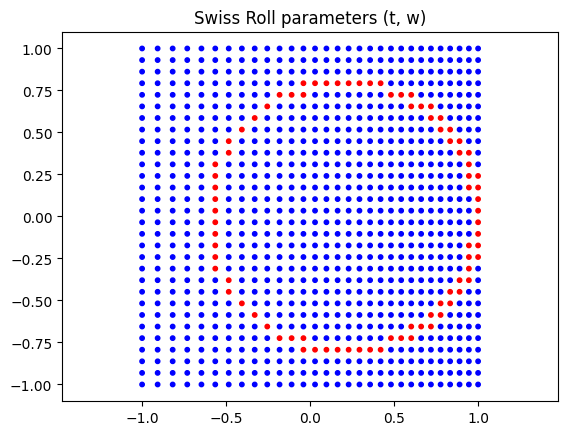

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
thetas_rescaled = scaler.fit_transform(thetas)
colors = create_colors(thetas_rescaled, c=np.array([0.2, 0]), r=0.8, eps=0.04)
plt.scatter(thetas_rescaled[:, 0], thetas_rescaled[:, 1], c=colors, s=10, cmap='bwr')
plt.axis('equal')
plt.title('Swiss Roll parameters (t, w)')

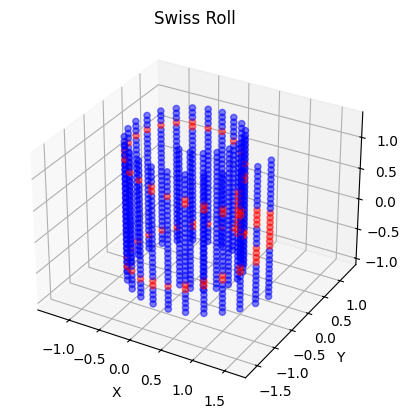

In [5]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xs[:, 0], Xs[:, 1], Xs[:, 2], marker='o', c=colors, cmap='bwr', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Swiss Roll')
plt.axis('equal')
plt.show()

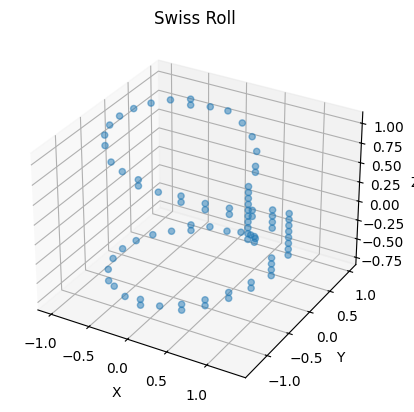

In [6]:
colored_idx = np.where(colors == 1)[0]
X_colored = Xs[colored_idx, :]
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_colored[:, 0], X_colored[:, 1], X_colored[:, 2], marker='o', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Swiss Roll')
plt.axis('equal')
plt.show()

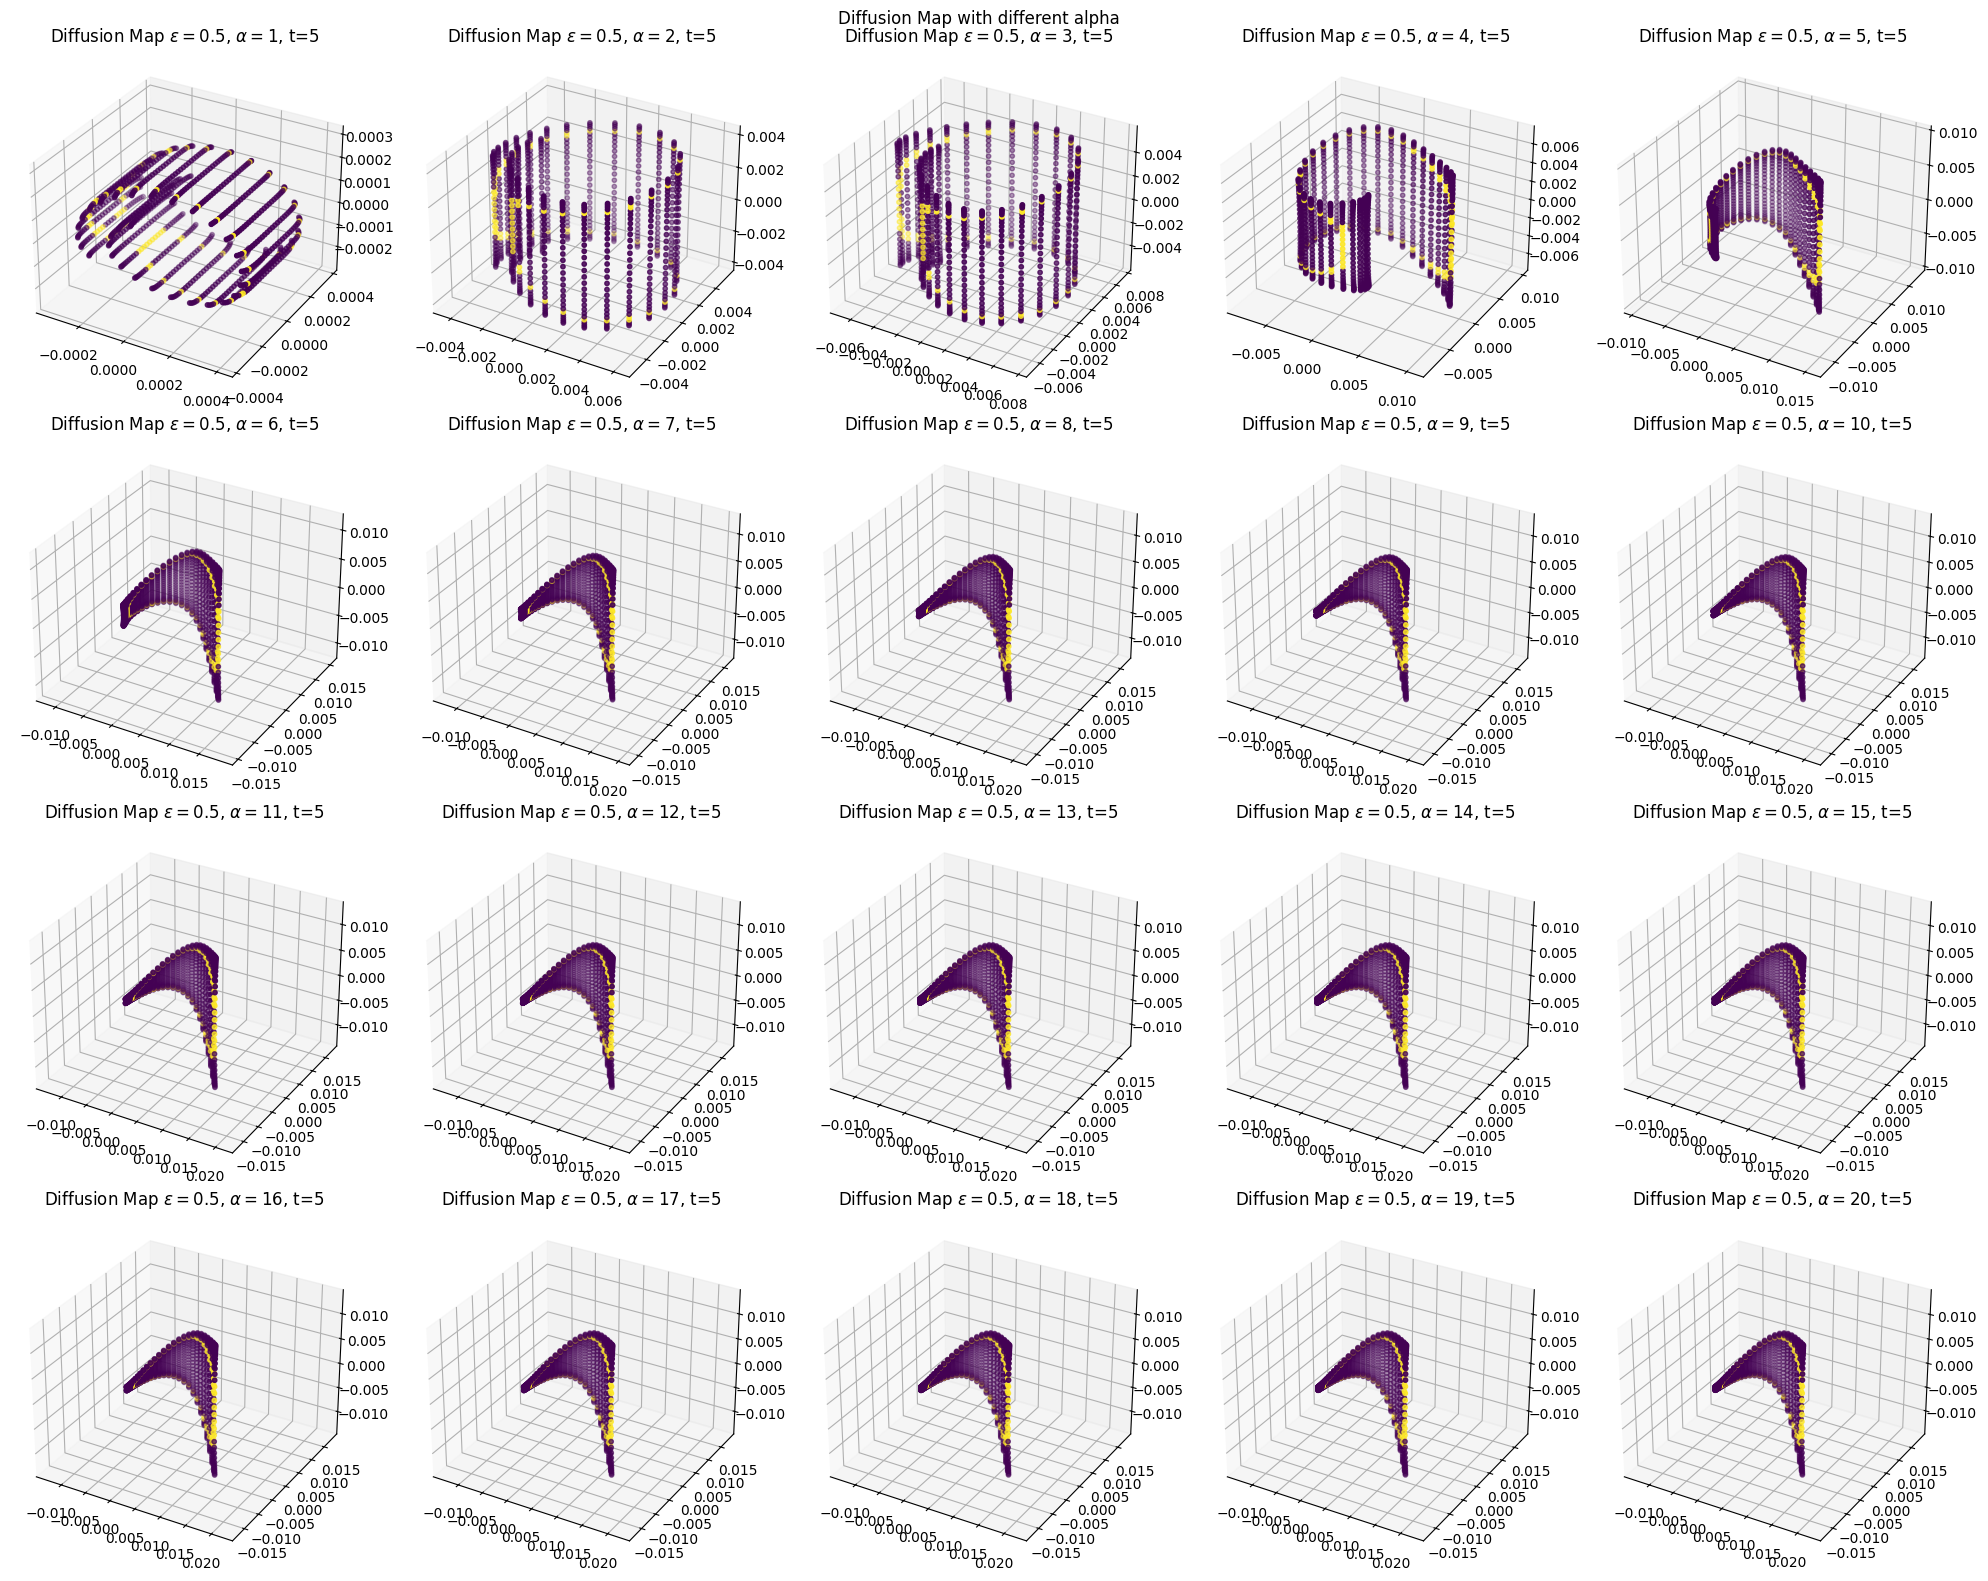

In [12]:
s = 10
# Create a 4x5 grid of subplots
fig = plt.figure(figsize=(20, 16))
epsilon = 0.5
alphas = range(1, 21)
t = 5
# Assuming petals is a function that you've defined to generate data
for i, alpha in enumerate(alphas):
    row = i // 5  # Integer division to get row index
    col = i % 5   # Remainder to get column index
    ax = fig.add_subplot(4, 5, i+1, projection='3d')
    P, d = make_diffusion_d(Xs, alpha=alpha, epsilon=epsilon)
    visuallize_diffusion_map_subplot_color_3d(Xs, P, d, ax=ax, colors=colors, name='petals', epsilon=epsilon, alpha=alpha, t=t, s=s, axisequal=True)
plt.suptitle('Diffusion Map with different alpha')
plt.tight_layout()

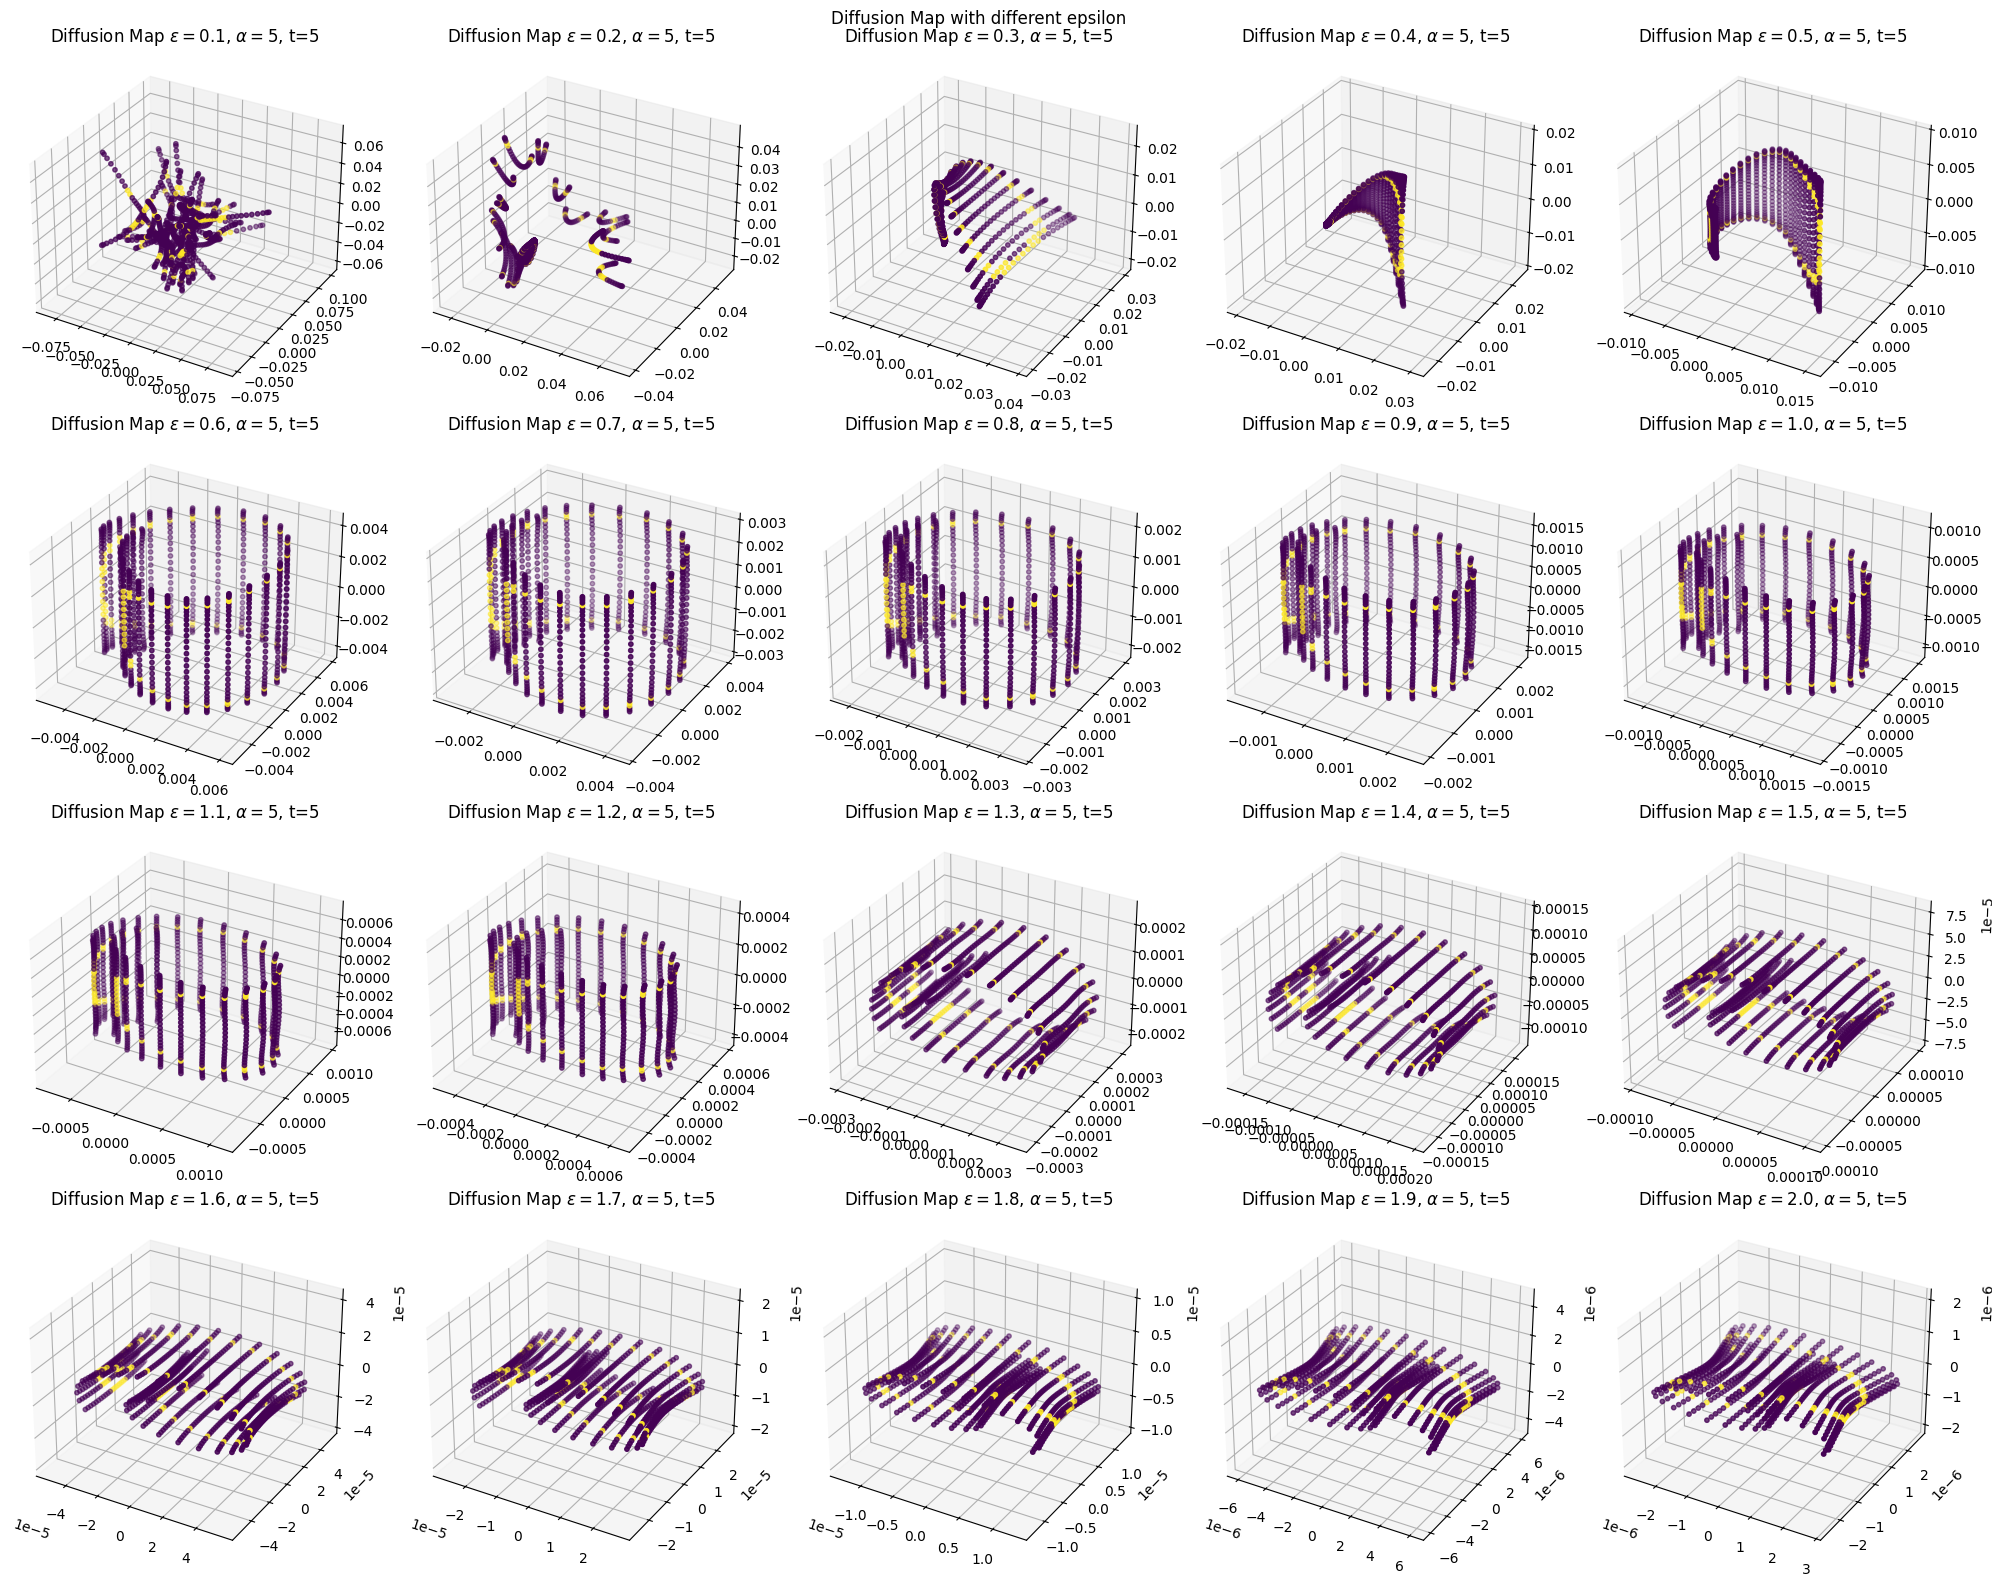

In [11]:
s = 10
# Create a 4x5 grid of subplots
fig = plt.figure(figsize=(20, 16))
k = 1
epsilons = np.arange(k, 20+k) * 0.1
alpha = 5
t = 5
# Assuming petals is a function that you've defined to generate data
for i, epsilon in enumerate(epsilons):
    row = i // 5  # Integer division to get row index
    col = i % 5   # Remainder to get column index
    ax = fig.add_subplot(4, 5, i+1, projection='3d')
    P, d = make_diffusion_d(Xs, alpha=alpha, epsilon=epsilon)
    visuallize_diffusion_map_subplot_color_3d(Xs, P, d, ax=ax, colors=colors, name='petals', epsilon=epsilon, alpha=alpha, t=t, s=s, axisequal=True)
plt.suptitle('Diffusion Map with different epsilon')
plt.tight_layout()


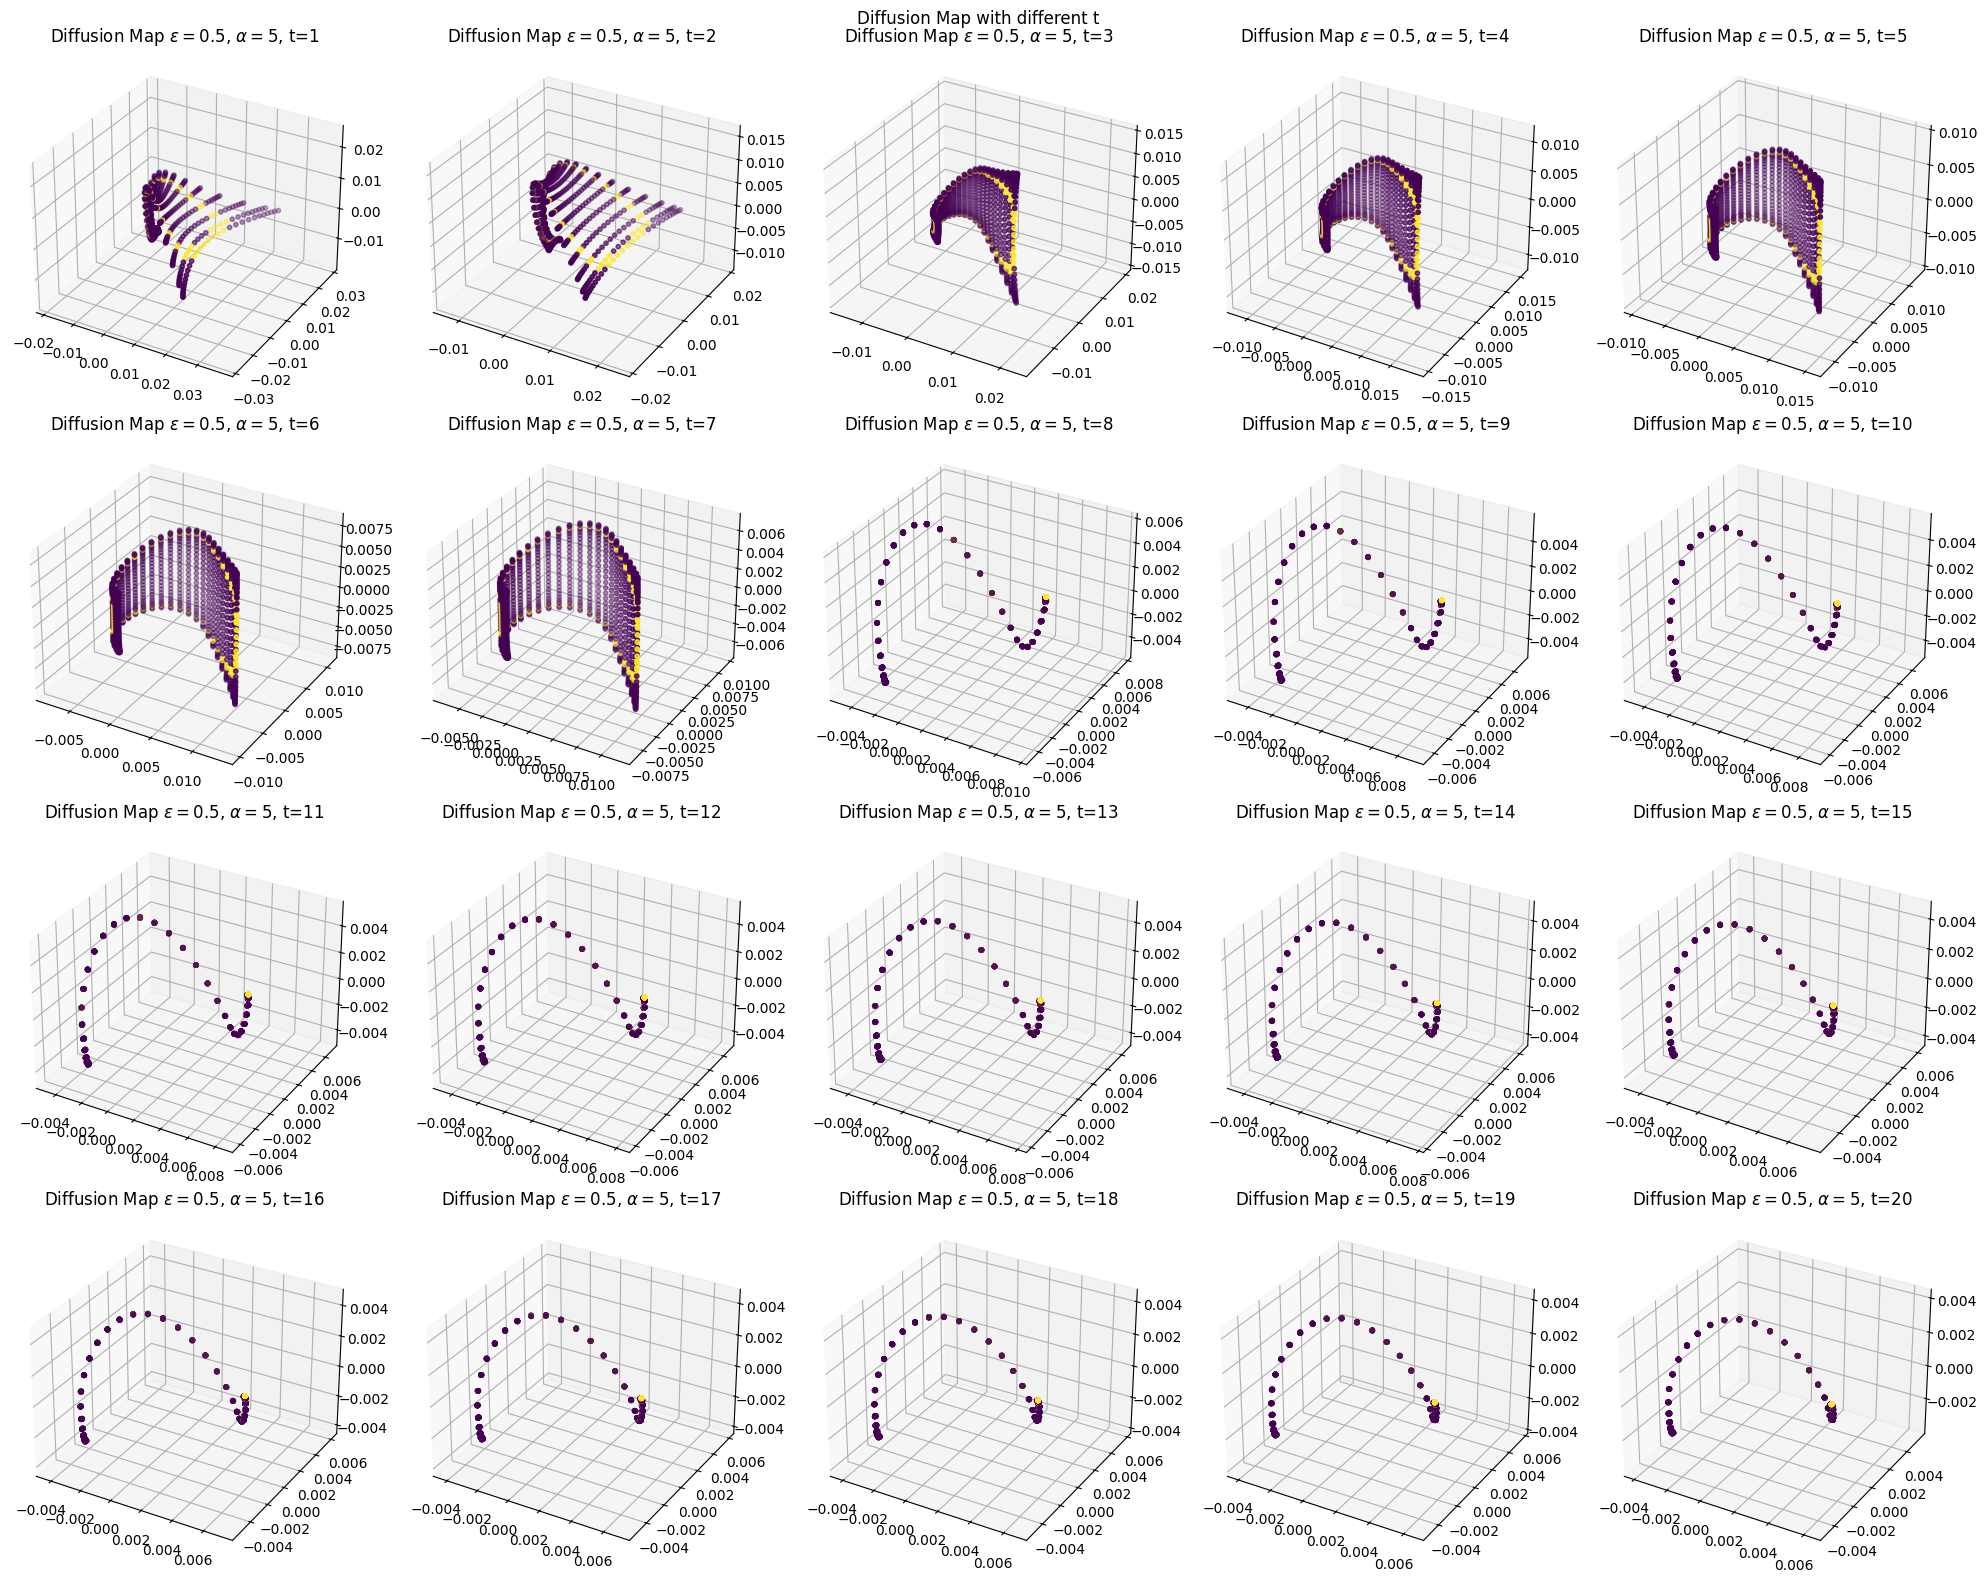

In [13]:
s = 10
# Create a 4x5 grid of subplots
fig = plt.figure(figsize=(20, 16))
epsilon = 0.5
alpha = 5
ts = range(1, 21)
# Assuming petals is a function that you've defined to generate data
for i, t in enumerate(ts):
    row = i // 5  # Integer division to get row index
    col = i % 5   # Remainder to get column index
    ax = fig.add_subplot(4, 5, i+1, projection='3d')
    P, d = make_diffusion_d(Xs, alpha=alpha, epsilon=epsilon)
    visuallize_diffusion_map_subplot_color_3d(Xs, P, d, ax=ax, colors=colors, name='petals', epsilon=epsilon, alpha=alpha, t=t, s=s, axisequal=True)
plt.suptitle('Diffusion Map with different t')
plt.tight_layout()


In [9]:
P, d = make_diffusion_d(Xs, alpha=5, epsilon=.5)
points_lawvere = calculate_lawvere_homology_diffu_dist_subset(P, colored_idx, t=5)
points_vr = calculate_vr_homology_subset(Xs, colored_idx)

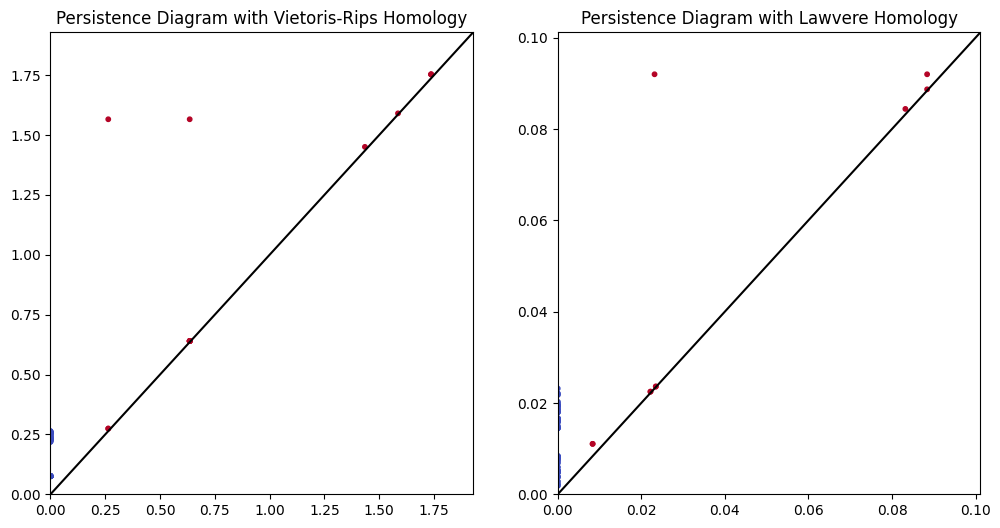

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
visualize_lawvere_homology(points_lawvere, axs[1], name='Lawvere Homology', s=10)
visualize_lawvere_homology(points_vr, axs[0], name='Vietoris-Rips Homology', s=10)
